In [1]:
cd c:\\Users\\drake\\Documents\\WGU\\Capstone\\AnalyticsCapstone\\

c:\Users\drake\Documents\WGU\Capstone\AnalyticsCapstone


In [2]:
#Explore the batter table
import sqlite3
import pandas as pd
from src.data.clean_data import get_batters_df, get_pitchers_df
import matplotlib.pyplot as plt

In [3]:
#batters data
batters_df = get_batters_df()
batters_df.head()
print(batters_df.shape)

(189, 33)


In [4]:
batters_df.sort_values(by='salary', ascending=False).head()

,fullName,age,team_name_abbr,comp_name_abbr,b_war,b_games,b_pa,b_ab,b_r,b_h,...,b_roba,b_rbat_plus,b_tb,b_gidp,b_hbp,b_sh,b_sf,b_ibb,pos,salary
90,Juan Soto,25,NYY,AL,7.9,157,713,576,128,166,...,0.424,179,328,10,4,0,4,2,*9/7DH,5.100000e+07
0,Aaron Judge,32,NYY,AL,10.8,158,704,559,122,180,...,0.484,223,392,22,9,0,2,20,*8D/97,4.000000e+07
5,Alex Bregman,30,HOU,AL,4.1,145,634,581,79,151,...,0.334,117,263,13,5,0,4,1,*5/D,4.000000e+07
129,Mike Trout,32,LAA,AL,1.1,29,126,109,17,24,...,0.372,136,59,0,1,0,0,1,8/D,3.554167e+07
48,Francisco Lindor,30,NYM,NL,6.9,152,689,618,107,169,...,0.373,141,309,7,12,0,3,0,*6/DH,3.410000e+07


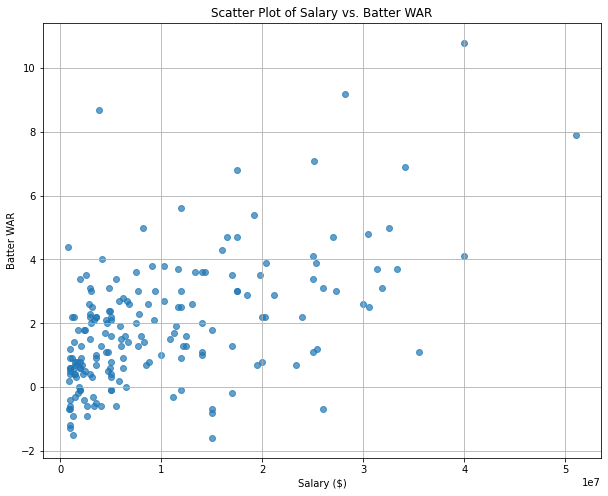

In [5]:
# Scatter plot between salary and b_war for batters
plt.figure(figsize=(10, 8))
plt.scatter(batters_df['salary'], batters_df['b_war'], alpha=0.7)
plt.xlabel('Salary ($)')
plt.ylabel('Batter WAR')
plt.title('Scatter Plot of Salary vs. Batter WAR')
plt.grid(True)
plt.show()


In [6]:
#pitchers data
pitchers_df = get_pitchers_df()
pitchers_df.head()
print(pitchers_df.shape)

(201, 36)


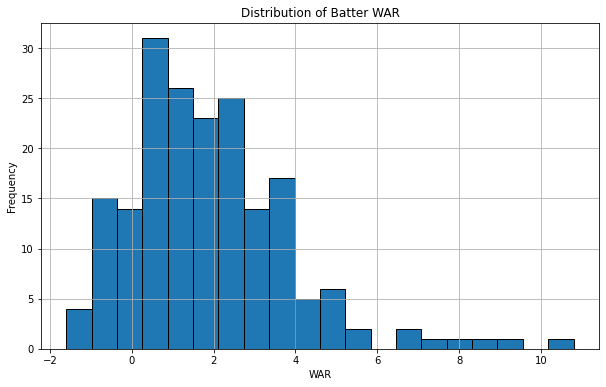

In [10]:
#Lets see the distrubtion of WAR for batters.
import matplotlib.pyplot as plt
import matplotlib

matplotlib.use('TkAgg')
plt.figure(figsize=(10,6))
plt.hist(batters_df['b_war'], bins=20, edgecolor='black')
plt.xlabel('WAR')
plt.ylabel('Frequency')
plt.title('Distribution of Batter WAR')
plt.grid(True)
plt.show()
fig_path = f"reports/figures/batter_war_distribution.png"
plt.savefig(fig_path)


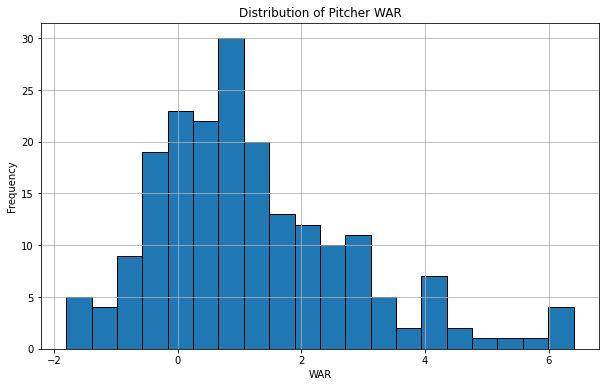

In [11]:
# Now for pitchers
plt.figure(figsize=(10,6))
plt.hist(pitchers_df['p_war'], bins=20, edgecolor='black')
plt.xlabel('WAR')
plt.ylabel('Frequency')
plt.title('Distribution of Pitcher WAR')
plt.grid(True)
plt.show()
fig_path = f"reports/figures/pitcher_war_distribution.png"
plt.savefig(fig_path)


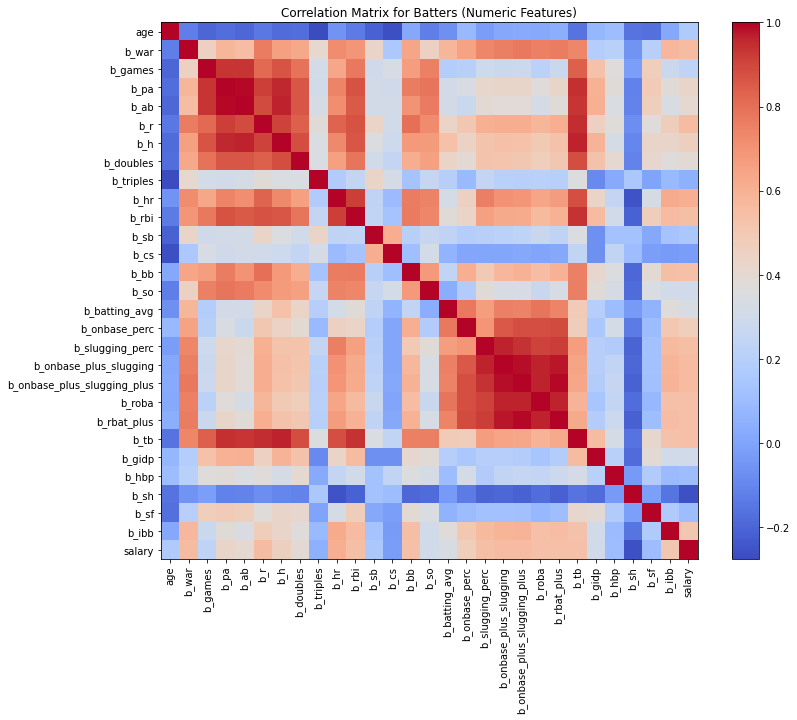

In [12]:
# I will generate a correlation matrix for the batters
# Select only numeric columns for correlation
batters_numeric = batters_df.select_dtypes(include='number')
corr_matrix = batters_numeric.corr()

plt.figure(figsize=(12,10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix for Batters (Numeric Features)')
plt.tight_layout()
plt.show()
fig_path = f"reports/figures/batter_correlation_matrix.png"
plt.savefig(fig_path)


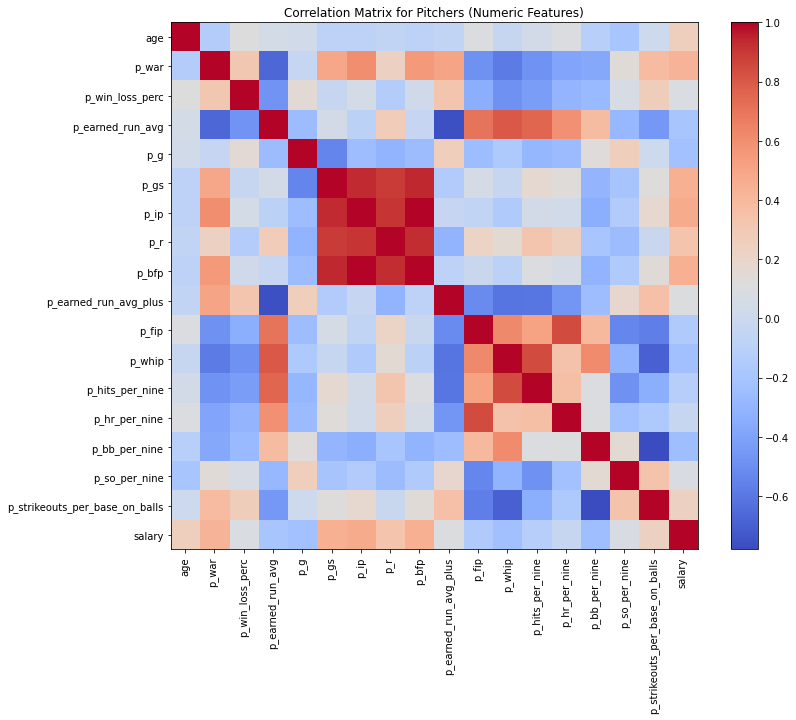

In [13]:
# And the same for the pitchers
pitchers_numeric = pitchers_df.select_dtypes(include='number')
corr_matrix = pitchers_numeric.corr()

plt.figure(figsize=(12,10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix for Pitchers (Numeric Features)')
fig_path = f"reports/figures/pitcher_correlation_matrix.png"
plt.savefig(fig_path)
plt.tight_layout()
plt.show()

There doesn't appear to be redundant columns in either dataframe, so we will keep all the numerical features for now.